<a href="https://colab.research.google.com/github/Blvisse/DSProjects/blob/master/TitanicProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from google.colab import files

In [2]:
files.upload()

Saving titanic.csv to titanic.csv


{'titanic.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\n13,0,3,"Saundercock, Mr

In [182]:
data=pd.read_csv('titanic.csv')

Let's have a look at the data we are working with.
We shall be doing this a lot in this notebook. It helps us understand how we are manipulating our data and track its progress and output

In [183]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We have 891 entries with 11 features with one predictive 

We can also note that we have a a couple of features missing some values

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The describe function returns some statistics on all numeric features of the data set 

In [118]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Visualization

Let's explore some visulaizatoin of our target feature.We can conclude that more passengers persihed than the ones who survived.

We have modeled a pie chart with the values

Text(0.5, 1.0, 'Survived and perished passengers in the Titanic Crash')

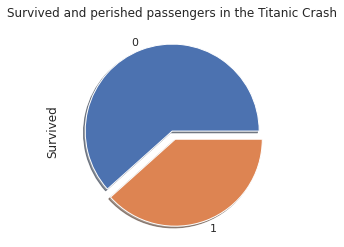

In [119]:
fig=data['Survived'].value_counts().plot.pie(explode=[0,0.1],shadow=True)
plt.title('Survived and perished passengers in the Titanic Crash')


A bar chart showing the number of survivors and perished

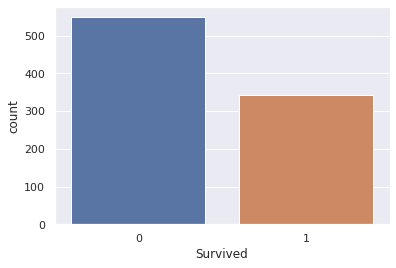

In [120]:
sns.set(style="darkgrid")
sns.countplot(x='Survived',data=data)

we step into the Passenger class segment we model a pic chart to figure out the percentage of passengers in each class

We can conclude that most passengers were on the 3rd class(51 %)

In [121]:
fig=px.pie(data,names='Pclass',title='Bar chart of the passenger classes')
fig.show()

We combine Survived and Passenger in the next graph to have a clue on the distribution of the surviors and non survivors based on the Passenger class

We note that most of the perished souls came from the 3rd class cabins while most of the passengers in the first class survived the crash

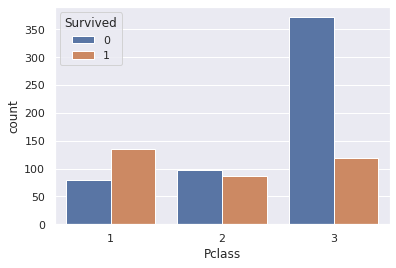

In [122]:
sns.countplot(x='Pclass',data=data,hue='Survived')


Let's check on the distribution of gender in the Titanic ship

Most of the Passengers are male, accounting for roughly 570 passengers(64.8%) 

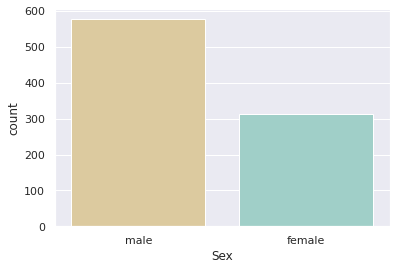

In [123]:
sns.countplot(data=data,x='Sex',palette='BrBG')

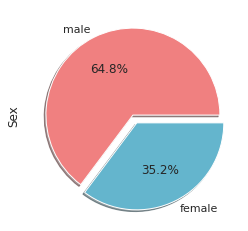

In [124]:
data['Sex'].value_counts().plot.pie(shadow=True,explode=[0,0.1],colors=['lightcoral','c'],autopct='%1.1f%%')

We try and plot the distribution of survived and perished based on the gender.

We discover that most of the females survived and most of the males perished

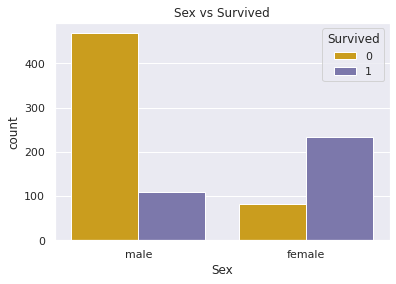

In [125]:
sns.countplot(x='Sex',data=data,hue='Survived',palette='Dark2_r')
plt.title('Sex vs Survived');


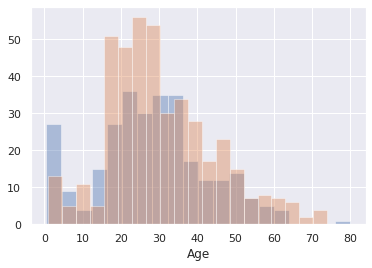

In [126]:
sns.set(style="darkgrid")
sns.distplot(data[data['Survived']==1].Age,bins=20,kde=False,label='Survived')
sns.distplot(data[data['Survived']==0].Age,bins=20,kde=False,label='Died')


Ditsribution of the passengers according to where they Embarked their journey from

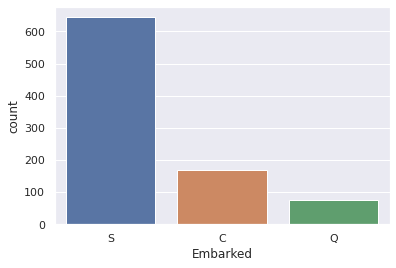

In [127]:
sns.countplot(data=data,x='Embarked')

A scatter plot showing the distribution of fare across various classes

In [185]:
fig=px.scatter(data,y='Fare',color='Pclass')
fig.show()

# EDA

We create a heatmap to generate a correlation between numerical features.

We can note that there exists a positive correlation between fare and our target variable with Passenger Class having a negative correlation with the target variable.

There is a negative correlation between the Passenger class and the Fare insinuating that being in third class(which the model considers a higher class) would result in you paying a lower fare price.

It also detects a negative correlation between the Passenger class and the Age of the passenger suggesting that majority of passengers of older ages were in the 1 st and 2nd classes.

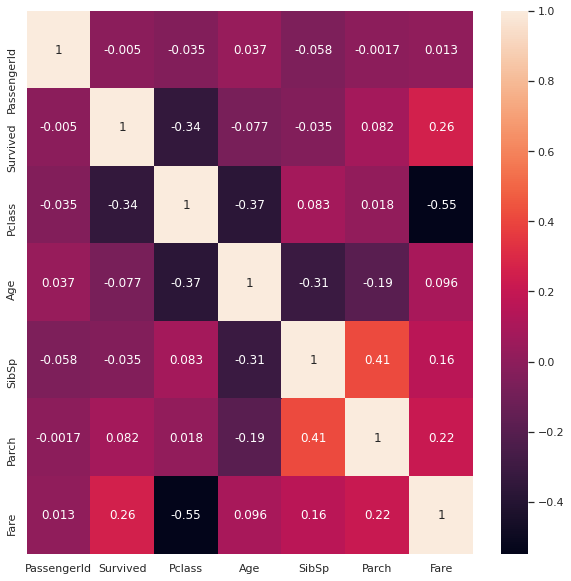

In [129]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [130]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We wont need the Passenger Id for this and hence we can drop it as it has very little correlation with any of the features

In [131]:
data.drop(labels='PassengerId',axis=1,inplace=True)

In [132]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


We can see that cabin has a large number of null values.It's advisable to drop it as that's a lot of guessing and EDA to get estimate values which might have a large effect on the accuracy of out model.

In [134]:
data.drop(labels='Cabin',axis=1,inplace=True)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [136]:
data[data['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


Next to go is age as it also presents a steep climb to get estimates of the missing values

In [137]:
data.dropna(subset=['Age'],axis=0,inplace=True)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Name      714 non-null    object 
 3   Sex       714 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     714 non-null    int64  
 6   Parch     714 non-null    int64  
 7   Ticket    714 non-null    object 
 8   Fare      714 non-null    float64
 9   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.4+ KB


The two missing values in the Embarked feature we can impute/fill with the mode/ most frequent value which is S

In [139]:
data.fillna(value='S',inplace=True)

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Name      714 non-null    object 
 3   Sex       714 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     714 non-null    int64  
 6   Parch     714 non-null    int64  
 7   Ticket    714 non-null    object 
 8   Fare      714 non-null    float64
 9   Embarked  714 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.4+ KB


In [141]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In this project we won't dive further and use names to predict age so we might as well just do away with them 

In [142]:
data.drop(labels='Name',axis=1,inplace=True)

In [143]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


We assign numerical values to the categorical column 'Sex'

In [144]:
data['Sex']=data['Sex'].map({'female':0,'male':1})

In [145]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,0,35.0,1,0,113803,53.1000,S
4,0,3,1,35.0,0,0,373450,8.0500,S


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Ticket    714 non-null    object 
 7   Fare      714 non-null    float64
 8   Embarked  714 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.8+ KB


In [147]:
data.drop(labels=['Ticket'],axis=1,inplace=True)

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Embarked  714 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 50.2+ KB


Create dummies of the fature Embarked

In [155]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_at__C,Embarked_at__Q,Embarked_at__S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [156]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_at__C,Embarked_at__Q,Embarked_at__S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,0,1,0
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,0,0


In [157]:
data=pd.get_dummies(data,prefix=['Pclass_'],columns=['Pclass'])

In [158]:
data

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_at__C,Embarked_at__Q,Embarked_at__S,Pclass__1,Pclass__2,Pclass__3
0,0,1,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,0,39.0,0,5,29.1250,0,1,0,0,0,1
886,0,1,27.0,0,0,13.0000,0,0,1,0,1,0
887,1,0,19.0,0,0,30.0000,0,0,1,1,0,0
889,1,1,26.0,0,0,30.0000,1,0,0,1,0,0


We create a new feautre family that will be an addition of Sibling Spouse and Parent Child.

In [159]:
data['Family']=data['SibSp']+data['Parch']+1

In [160]:
data

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_at__C,Embarked_at__Q,Embarked_at__S,Pclass__1,Pclass__2,Pclass__3,Family
0,0,1,22.0,1,0,7.2500,0,0,1,0,0,1,2
1,1,0,38.0,1,0,71.2833,1,0,0,1,0,0,2
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,1,1
3,1,0,35.0,1,0,53.1000,0,0,1,1,0,0,2
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,0,39.0,0,5,29.1250,0,1,0,0,0,1,6
886,0,1,27.0,0,0,13.0000,0,0,1,0,1,0,1
887,1,0,19.0,0,0,30.0000,0,0,1,1,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0,1,0,0,1


In [161]:
data.drop(labels=['SibSp','Parch'],axis=1,inplace=True)

In [162]:
data

,Survived,Sex,Age,Fare,Embarked_at__C,Embarked_at__Q,Embarked_at__S,Pclass__1,Pclass__2,Pclass__3,Family
0,0,1,22.0,7.2500,0,0,1,0,0,1,2
1,1,0,38.0,71.2833,1,0,0,1,0,0,2
2,1,0,26.0,7.9250,0,0,1,0,0,1,1
3,1,0,35.0,53.1000,0,0,1,1,0,0,2
4,0,1,35.0,8.0500,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,0,39.0,29.1250,0,1,0,0,0,1,6
886,0,1,27.0,13.0000,0,0,1,0,1,0,1
887,1,0,19.0,30.0000,0,0,1,1,0,0,1
889,1,1,26.0,30.0000,1,0,0,1,0,0,1


In [163]:
scaler=StandardScaler()
data[['Age','Fare']]=scaler.fit_transform(data[['Age','Fare']])

In [164]:
data.head()

,Survived,Sex,Age,Fare,Embarked_at__C,Embarked_at__Q,Embarked_at__S,Pclass__1,Pclass__2,Pclass__3,Family
0,0,1,-0.530377,-0.518978,0,0,1,0,0,1,2
1,1,0,0.571831,0.691897,1,0,0,1,0,0,2
2,1,0,-0.254825,-0.506214,0,0,1,0,0,1,1
3,1,0,0.365167,0.348049,0,0,1,1,0,0,2
4,0,1,0.365167,-0.503850,0,0,1,0,0,1,1


In [165]:
X=data.iloc[:,1:]
y=data.iloc[:,0]

In [166]:
X.head()

,Sex,Age,Fare,Embarked_at__C,Embarked_at__Q,Embarked_at__S,Pclass__1,Pclass__2,Pclass__3,Family
0,1,-0.530377,-0.518978,0,0,1,0,0,1,2
1,0,0.571831,0.691897,1,0,0,1,0,0,2
2,0,-0.254825,-0.506214,0,0,1,0,0,1,1
3,0,0.365167,0.348049,0,0,1,1,0,0,2
4,1,0.365167,-0.503850,0,0,1,0,0,1,1


In [167]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Model Training

We start training our model here 

In [170]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

We are going to test using three classificatoin models LogisticRegression,RandomForestRegressor and Classifier

In [171]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
LPrediction=LR.predict(X_test)

In [172]:
print("Accuracy:",round(LR.score(X_train, y_train)*100,2))

Accuracy: 79.51


Random Forest Classifier Takes the day with the best score of all

In [174]:
randomForest=RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
RFPredictions=randomForest.predict(X_test)

In [175]:
randomForest.score(X_train,y_train)


0.9912434325744308

In [178]:
randomforest=RandomForestRegressor(n_estimators=100)
randomforest.fit(X_train,y_train)
rfPredictions=randomforest.predict(X_test)

In [179]:
randomforest.score(X_train,y_train)

0.9049436300047986